# **Exploratory Data Analysis on Online Course Enrollment Data**


## 1. Getting Started and Loading the datasets

### 1.1 Importing Libraries:

**Let us start by importing the necessary libraries for our analysis.**

In [3]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 1.2 Loading the Dataset:

In [5]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [6]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [7]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


The COURSE_ID and TITLE are str datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.

### 1.3 Check for missing values and data types

In [10]:
course_df.isnull().sum()

COURSE_ID          0
TITLE              0
Database           0
Python             0
CloudComputing     0
DataAnalysis       0
Containers         0
MachineLearning    0
ComputerVision     0
DataScience        0
BigData            0
Chatbot            0
R                  0
BackendDev         0
FrontendDev        0
Blockchain         0
dtype: int64

So there are no missing values in the dataset

In [12]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

## 2. Exploratory Data Analysis:

### 2.1 Ploting a Word Cloud from Course Titles


In [15]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [16]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [17]:
# Filtering out common stop words and some less meaningful words:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [18]:
# Creating a WordCloud object and generating wordcloud from the titles:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

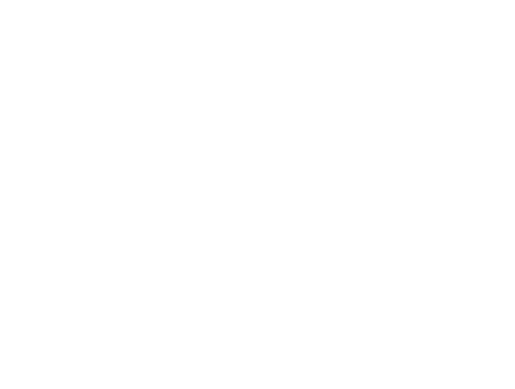

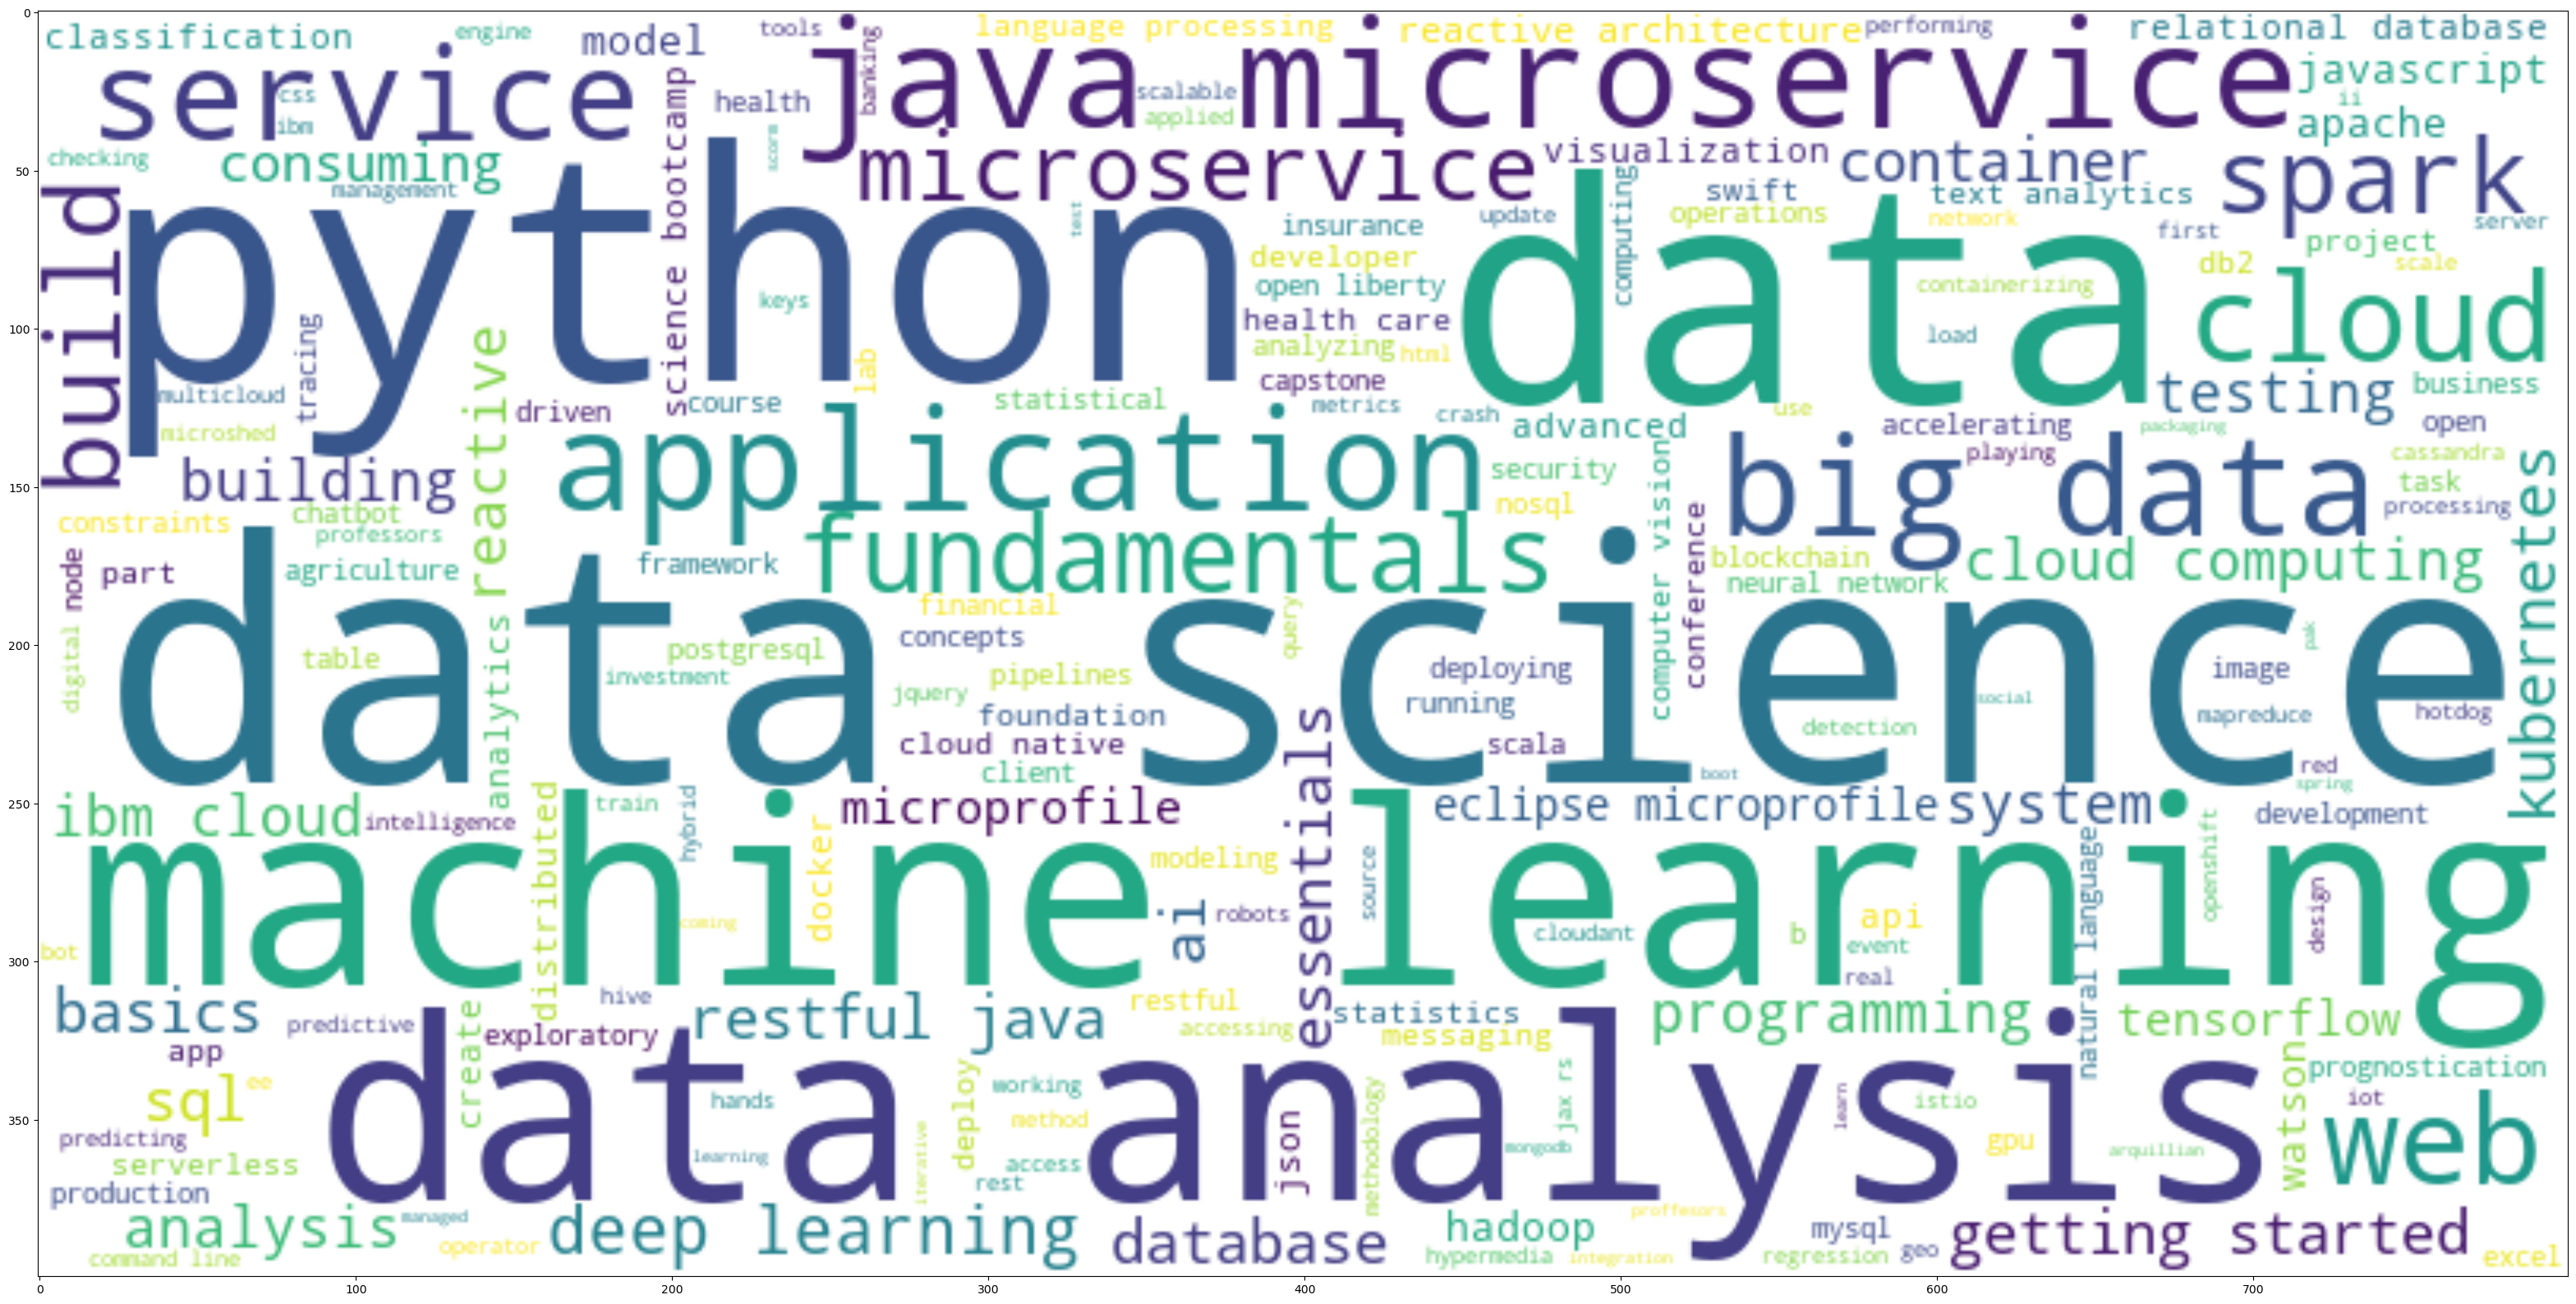

In [19]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

### 2.2 Analyzing Course Genres

In [21]:
# Genreating a sorted course count per genre:
column_sums = course_df.iloc[:, 2:].sum()
column_sums_sorted = column_sums.sort_values(ascending=False)
column_sums_df = column_sums_sorted.reset_index()
column_sums_df.columns = ['Genre', 'Count']
column_sums_df

,Genre,Count
0,BackendDev,78
1,MachineLearning,69
2,Database,60
3,DataAnalysis,56
4,DataScience,38
5,CloudComputing,37
6,BigData,36
7,Python,28
8,FrontendDev,19
9,Containers,17


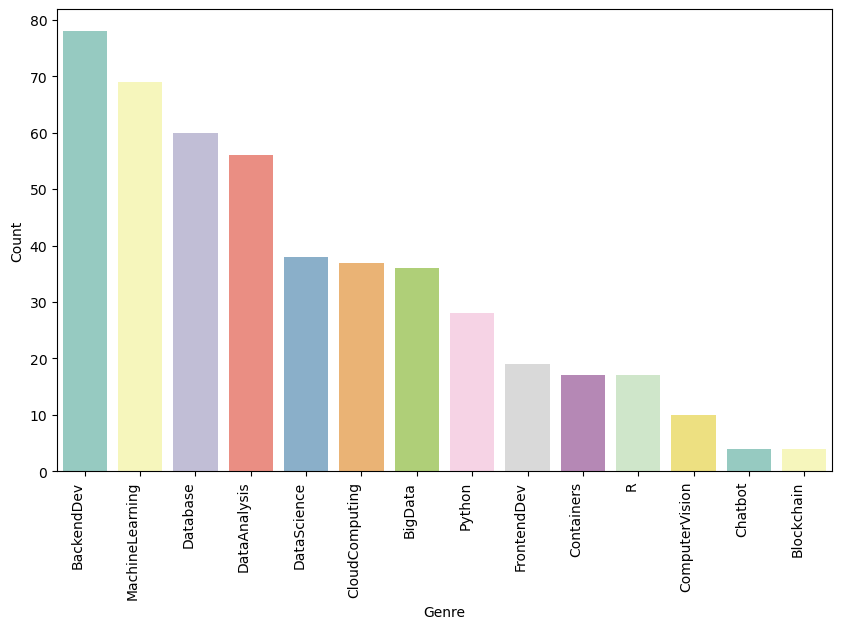

In [22]:
# Plot the sum of each column using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=column_sums_df, palette='Set3' , hue='Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Add labels and title
plt.xlabel("Genre")
plt.ylabel("Count")

# Show the plot
plt.show()

### 2.3 Analyzing Course Enrollments

In [26]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [27]:
ratings_df['rating'].unique()

array([5, 3, 4], dtype=int64)

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


In [29]:
# Number of ratings in the dataset
ratings_df.shape[0]

233306

In [30]:
# Aggregating the rating count for each user:
df_user =ratings_df.groupby('user').size()
df_user

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

In [31]:
# User rating counts.
value_counts = df_user.value_counts()
value_counts

1     8320
5     6179
6     4455
7     3168
8     2344
9     1665
10    1408
11    1093
12     840
13     666
14     508
15     436
2      382
16     328
17     287
18     260
19     210
20     177
21     120
22     119
23     106
3      102
24      74
25      71
26      70
27      55
31      41
29      38
30      35
4       35
28      30
35      29
32      29
33      28
34      24
38      21
36      20
37      16
39      15
40      15
42      10
43      10
44       9
45       9
46       9
47       8
49       7
41       7
50       5
48       4
51       2
59       1
61       1
Name: count, dtype: int64

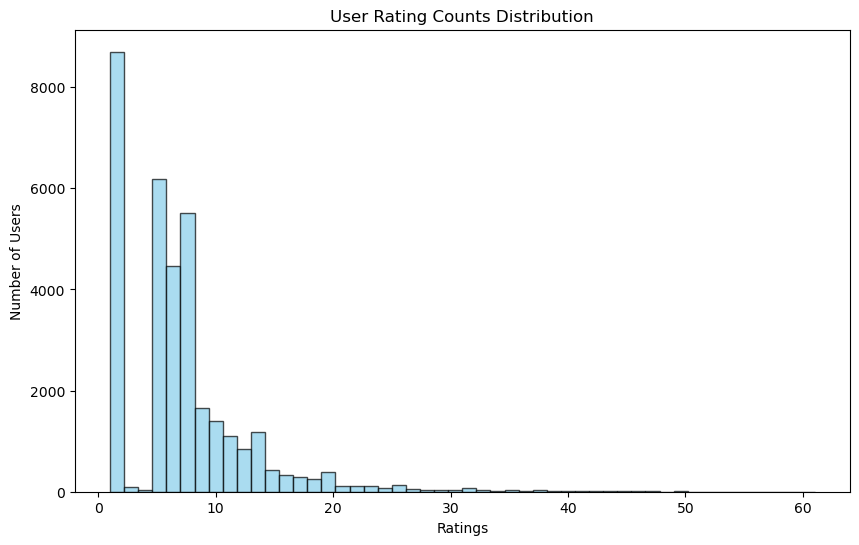

In [54]:
plt.figure(figsize=(10, 6))
df_user.hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.title('User Rating Counts Distribution')
plt.grid(False)
plt.show()

### 2.4 Finding Top-20 Most Popular Courses

In [272]:
# Finding top-20 Most Popular Courses
top_courses = ratings_df.groupby('item').size().reset_index()
top_courses.columns = ['Course' , 'Enrolls']
top_courses = top_courses.sort_values(by='Enrolls', ascending=False).reset_index(drop=True)[:20]
top_courses

,Course,Enrolls
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [274]:
# Merging Datasets to get Title Column
merged_df = pd.merge(top_courses, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='Course', right_on='COURSE_ID')
merged_df[['Course' , 'TITLE', 'Enrolls']]

,Course,TITLE,Enrolls
0,PY0101EN,python for data science,14936
1,DS0101EN,introduction to data science,14477
2,BD0101EN,big data 101,13291
3,BD0111EN,hadoop 101,10599
4,DA0101EN,data analysis with python,8303
5,DS0103EN,data science methodology,7719
6,ML0101ENv3,machine learning with python,7644
7,BD0211EN,spark fundamentals i,7551
8,DS0105EN,data science hands on with open source tools,7199
9,BC0101EN,blockchain essentials,6719
